https://www.kaggle.com/ojwatson/mixed-models
What is the difference between linear and logistic regression? 
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression
怎样做multinominal logistic regression?
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn as sk
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv('/users/nannanliu/Python/SCIPPC/collective_personal_pronoun/we_cn.csv')

In [31]:
data.head(20)

,number,year,topic,translated_into,referent_presence,referent
0,1,2003,CRM,we/our/us,no,inclusive
1,2,2003,CRM,we/our/us,no,inclusive
2,3,2003,CN,we/our/us,no,inclusive
3,4,2003,CN,china/chinese/chinas,yes,guojia
4,5,2003,CN,we/our/us,yes,guojia
5,6,2003,QS,we/our/us,no,people
6,7,2003,CN,omitted,no,this government
7,8,2003,CN,we/our/us,no,this government
8,9,2003,CN,we/our/us,no,this government
9,10,2003,CN,we/our/us,no,this government


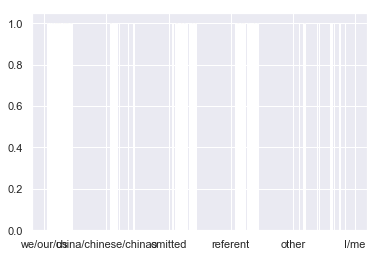

In [27]:
plt.hist(data.translated_into)
plt.show()

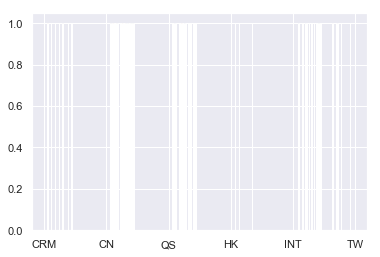

In [28]:
plt.hist(data.topic)
plt.show()

TypeError: Could not convert we/our/uswe/our/uswe/our/uschina/chinese/chinaswe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedchina/chinese/chinasreferentwe/our/usreferentreferentwe/our/uswe/our/uswe/our/usomittedreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usreferentreferentreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uschina/chinese/chinaschina/chinese/chinaswe/our/uschina/chinese/chinasotherwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uschina/chinese/chinasI/meomittedI/mewe/our/usreferentwe/our/uswe/our/uswe/our/uschina/chinese/chinasI/meomittedomittedwe/our/uswe/our/usomittedwe/our/uschina/chinese/chinasomittedomittedreferentreferentomittedI/mewe/our/uswe/our/uswe/our/uschina/chinese/chinasreferentwe/our/uschina/chinese/chinaswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usreferentreferentreferentwe/our/uswe/our/usomittedreferentwe/our/uschina/chinese/chinasI/mechina/chinese/chinasomittedomittedotherwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uschina/chinese/chinaswe/our/usreferentomittedwe/our/uswe/our/usreferentwe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/usotheromittedomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uschina/chinese/chinaswe/our/usomittedreferentwe/our/uswe/our/usomittedreferentwe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/usreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedomittedreferentwe/our/uswe/our/uswe/our/usI/mewe/our/usomittedwe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usI/mewe/our/usomittedomittedwe/our/uswe/our/uswe/our/uswe/our/usI/mereferentwe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usreferentreferentwe/our/uswe/our/uswe/our/usreferentwe/our/uswe/our/uswe/our/usomittedreferentwe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/usomittedwe/our/usreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/usreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/usreferentomittedwe/our/usomittedwe/our/usreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/usI/mechina/chinese/chinasreferentreferentreferentomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/usomittedomittedomittedwe/our/usreferentwe/our/uswe/our/uswe/our/usomittedwe/our/usreferentreferentomittedwe/our/uswe/our/uswe/our/usreferentwe/our/uswe/our/uswe/our/usomittedwe/our/uswe/our/usreferentotheromittedreferentwe/our/usomittedwe/our/usomittedwe/our/usreferentomittedwe/our/usreferentwe/our/uswe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedreferentreferentreferentreferentomittedwe/our/usomittedreferentomittedwe/our/usomittedreferentwe/our/uswe/our/usomittedwe/our/uswe/our/uswe/our/uschina/chinese/chinaswe/our/uschina/chinese/chinaswe/our/uswe/our/usotheromittedwe/our/uswe/our/usreferentreferentomittedomittedomittedwe/our/uswe/our/uswe/our/uswe/our/uswe/our/usomittedwe/our/uschina/chinese/chinaswe/our/uschina/chinese/chinasomittedomittedwe/our/us to numeric

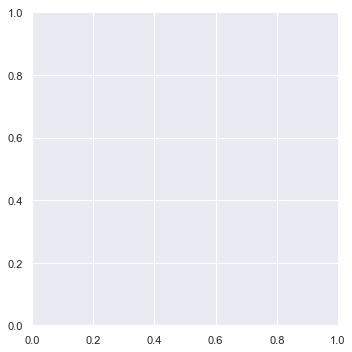

In [26]:
sns.lmplot(x='topic', y= 'translated_into', data=data)